# The Spark Foundation Internship

## Task 1:Prediction Using Supervised ML
In this regression task we will predict the percentage of marks that a student is expected to score based upon the number of hours they studied. This is a simple linear regression task as it involves just two variables.

## Author:MARREDDY SAI SURYA VENKATA MANIKANTA

## Importing the packages

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Uploading the Dataset

In [7]:
data = pd.read_csv('http://bit.ly/w-data')

## Exploratory Data Analysis

In [8]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [10]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [11]:
data.shape

(25, 2)

## Checking the relation between Independent and Target Variable

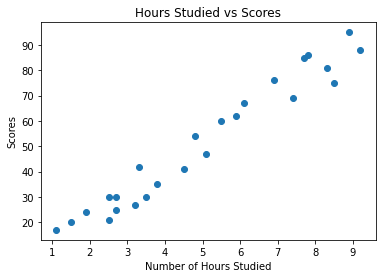

In [15]:
plt.scatter(data['Hours'], data['Scores'])
plt.xlabel("Number of Hours Studied")
plt.ylabel("Scores")
plt.title("Hours Studied vs Scores")
plt.show()

## Splitting the data into for training and testing

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data['Hours'].values.reshape(-1,1), data['Scores'], test_size = 0.2, random_state = 40)
print(X_train)

[[8.5]
 [4.8]
 [3.2]
 [5.9]
 [1.9]
 [3.5]
 [8.3]
 [2.5]
 [3.8]
 [2.7]
 [2.5]
 [2.7]
 [7.7]
 [6.9]
 [4.5]
 [5.1]
 [6.1]
 [1.5]
 [5.5]
 [9.2]]


In [17]:

print(y_train)

3     75
21    54
2     27
11    62
17    24
4     30
8     81
16    30
22    35
20    30
0     21
9     25
10    85
23    76
12    41
1     47
18    67
5     20
7     60
6     88
Name: Scores, dtype: int64


In [18]:

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((20, 1), (20,), (5, 1), (5,))

## Training the Linear Regression Model

In [19]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)



LinearRegression()

In [20]:
coefficient = model.coef_
intercept = model.intercept_

In [22]:
line = (data['Hours'].values * coefficient) + intercept

In [23]:
print(coefficient)

[9.74054996]


In [24]:
print(intercept)

1.7557382016513827


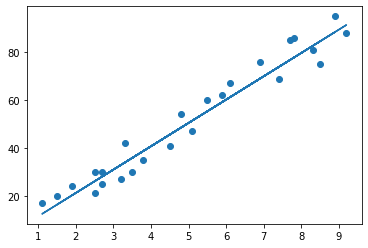

In [26]:
plt.scatter(data.Hours, data.Scores)
plt.plot(data.Hours, line)
plt.show()

In [27]:
pred = model.predict(X_test)
pred

array([88.44663283, 77.73202788, 12.47034316, 73.83580789, 33.89955306])

## Comparing Actual and Predicted Values

In [28]:
pred_compare = pd.DataFrame({'Actual Values': y_test, 'Predicted Values':pred})
pred_compare

,Actual Values,Predicted Values
15,95,88.446633
24,86,77.732028
14,17,12.470343
19,69,73.835808
13,42,33.899553


## Evaluating the Model

In [29]:

from sklearn import metrics


print("Mean Absolute Error: ", metrics.mean_absolute_error(y_test, pred))
print("Mean Squared Error: ", metrics.mean_squared_error(y_test, pred))
print("Root Mean Squared Error: ", metrics.mean_squared_error(y_test, pred)**0.5)
print("R2 Score: ", metrics.r2_score(y_test, pred))

Mean Absolute Error:  6.457450193167183
Mean Squared Error:  44.1652107906905
Root Mean Squared Error:  6.645691144695975
R2 Score:  0.9466449081971943


## What will be predicted score if a student study for 9.25 hrs in a day?

In [30]:
hours = np.asarray(9.25).reshape(-1,1)
print(f"{model.predict(hours)[0]} will be predicted score if a student study for 9.25 hrs in a day.")


91.85582531626392 will be predicted score if a student study for 9.25 hrs in a day.
